## Top-Down Dynamic Programming Solution
### Intuition
Iterate over coins. For each coin, either take coin and decrease remaining amount needed, or ignore coin and move onto next. Add number of ways from both choices.

Let `number_of_ways()` be recursive method with two parameters, index `i` of current coin and remaining `amount` needed. Returns number of ways to make up `amount` by only considering coins from index `i`. If `amount` is `0`, return `1`. If `i` == `n`, return `0`.

#### Recursive Relationship
If current coin is more than remaining amount, skip current coin. Otherwise consider both skipping current coin or using it.

```python
if coins[i] > amount:
    number_of_ways(i, amount) = number_of_ways(i + 1, amount)
else:
    number_of_ways(i, amount) = number_of_ways(i, amount - coins[i]) + number_of_ways(i + 1, amount)
```

### Example
`coins = [2, 2, 1]`, `amount = 6`

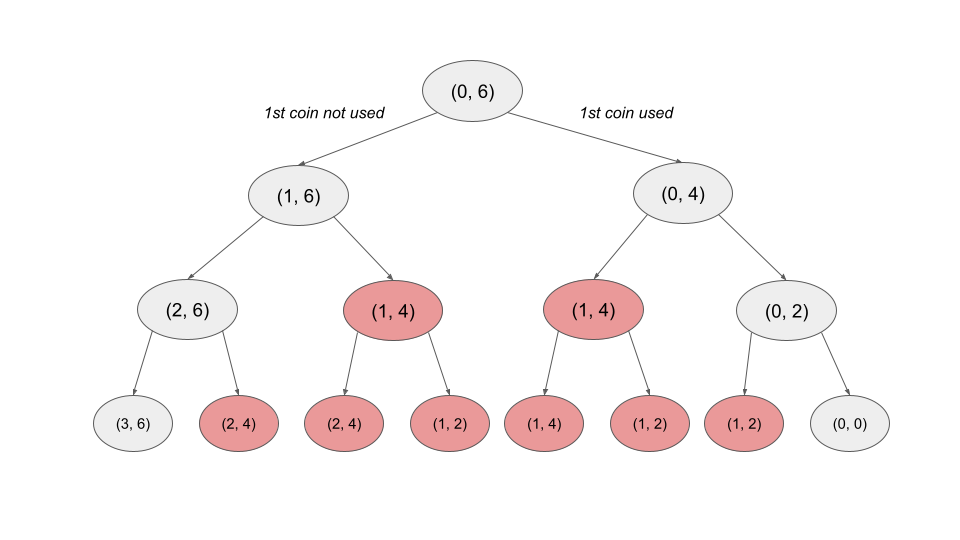

Notice the repeating subproblems. Use memoization to store solution of each sub-problem. `memo[coin_idx][cur_amount]` stores number of ways to make up `cur_amount` using coins beginning from index `i`

### Algorithm
1. 2D array `memo` with `n` rows and `amount + 1` columns. Initialize with `-1` to indicate not solved yet.
2. Recursive `number_of_ways` with parameters `i` and `amount`. Returns number of ways to make up `amount` using coins starting from `i` to last coin.
    - `amount == 0`, return `1`
    - `i == n`, return `0`
    - if in `memo`, return `memo[i][amount]`
    - if current coin exceeds `amount`, cannot use it, so set `memo[i][amount] = number_of_ways(i + 1, amount)` and return it
    - otherwise, `memo[i][amount] = number_of_ways(i, amount - coins[i]) + number_of_ways(i + 1, amount)`
3. Return `number_of_ways(0, amount)`, answer to original problem

In [2]:
def change(amount, coins):
    def number_of_ways(i, amount):
        if i == len(coins):
            return 0
        elif amount == 0:
            return 1
        elif memo[i][amount] != -1:
            return memo[i][amount]
        elif coins[i] > amount:
            memo[i][amount] = number_of_ways(i + 1, amount)
        else:
            memo[i][amount] = number_of_ways(i, amount - coins[i]) + number_of_ways(i + 1, amount)
        
        return memo[i][amount]
    
    memo = [[-1] * (amount + 1) for _ in range(len(coins))]
    return number_of_ways(0, amount)

## Bottom-Up Dynamic Programming Solution
### Intuition
2D list `dp` where `dp[i][cur_amount]` is number of ways to make up `cur_amount` using coins beginning from index `i`. `dp[i][cur_amount]` is same as `number_of_ways(i, cur_amount)` from before.

### Algorithm
1. 2D array `dp` with `n + 1` rows and `amount + 1` columsn where `dp[i][cur_amount]` stores number of ways to make up `cur_amount` using coins starting from `i`
2. Set `dp[i][0] = 1` for all `i` as base case
3. Outer loop from `i = n - 1` to `0`, index of current coin. Inner loop from `cur_amount = 1` to `amount`, controls amount to be made up.
    a. If value of current coin at index `i` exceeds `cur_amount`, cannot use it and set `dp[i][cur_amount] = dp[i + 1][cur_amount]`
    b. Otherwise, `dp[i][cur_amount] = dp[i + 1][cur_amount] + dp[i][cur_amount - coins[i]]`
4. Return `dp[0][cur_amount]`

In [1]:
def change(amount, coins):
    n = len(coins)
    dp = [[0] * (amount + 1) for _ in range(n + 1)]
    for i in range(n):
        dp[i][0] = 1

    for i in range(n - 1, -1, -1):
        for cur_amount in range(1, amount + 1):
            if coins[i] > cur_amount:
                dp[i][cur_amount] = dp[i + 1][cur_amount]
            else:
                dp[i][cur_amount] = dp[i + 1][cur_amount] + dp[i][cur_amount - coins[i]]
    
    return dp[0][amount]

## Bottom-Up DP with Space Optimization Solution

### Intuition
Previous state transition is `dp[i][cur_amount] = dp[i + 1][cur_amount] + dp[i][cur_amount - coins[i]]`.

Notice that to fill `dp[i][cur_amount]`, only need `dp[i]` and `dp[i + 1]` rows.

So, we can optimize by justusing one 1D array `dp` of size `amount + 1`/

#### Algorithm
1. Create array `dp` of size `amount + 1`. Initialize `dp[0] = 1`.
2. Fill `dp` using two loops.
    - Outer loop runs from `i = n - 1` to `0`.
    - Inner loops runs from `cur_amount = coins[i]` to `amount`
    - In nested loop, perform `dp[cur_amount] += dp[cur_amount - coins[i]]`
3. Return `dp[amount]`

In [ ]:
def change(amount, coins):
    n = len(coins)
    dp = [0] * (amount + 1)
    dp[0] = 1

    for i in range(n - 1, -1, -1):
        for cur_amount in range(coins[i], amount + 1):
            dp[cur_amount] += dp[cur_amount - coins[i]]
    
    return dp[amount]